# fraud-transaction-detection

Use the "Run" button to execute the code.

# EDA

## Download Data

In [1]:
!pip install opendatasets --upgrade --quiet

 - Download Kaggle API key from your kaggle account and Use it here.

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/miznaaroob/fraudulent-transactions-data'
od.download(dataset_url)

100%|██████████| 178M/178M [00:00<00:00, 215MB/s]


In [3]:
data_filename = '/content/fraudulent-transactions-data/Fraud.csv'

## Data Preparation and Cleaning

- load the file using pandas
- Look at info about data and columns
- fix missing or incorrect values

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [5]:
df = pd.read_csv(data_filename)    # might take almost a minutes

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
len(df)

6362620

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe

<bound method NDFrame.describe of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   

In [11]:
df.isnull().count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [12]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Exploratory Ananlysis and Visualization

- Columns to analize:
1. Amount
2. type

In [13]:
df.amount

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [14]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

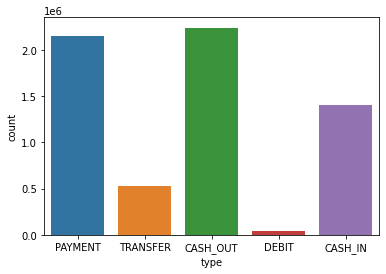

In [15]:
t = df
sns.countplot(x='type',data=t)

In [16]:
# total no. of Fraudlent cases in data
len_not_fraud = len(df['isFraud'][df.isFraud == 0])
len_is_fraud = len(df['isFraud'][df.isFraud == 1])

arr = np.array([len_not_fraud, len_is_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {len_not_fraud}")
print(f"Total No. Fraudulent Cases: {len_is_fraud}")

Total No. of Non-Fraudulent Cases: 6354407
Total No. Fraudulent Cases: 8213


# Model


In [17]:
df.drop(['nameOrig','nameDest'], axis = 1, inplace = True)
data = df.copy(deep=True)
catCols = [col for col in data.columns if data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
  data[item] = lb_make.fit_transform(data[item])

In [18]:
# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

In [19]:
# plot confusion matrix for the model
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(20,7))
    plt.rcParams['font.size'] = '16'
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

Accuracy Score:  0.9983128019589415
Precision Score:  0.35916622127204706
Recall Score:  0.4148148148148148
F1 Score:  0.3849899742194214
Confusion Matrix:  [[1269705    1199]
 [    948     672]]
Confusion matrix, without normalization
[[1269705    1199]
 [    948     672]]


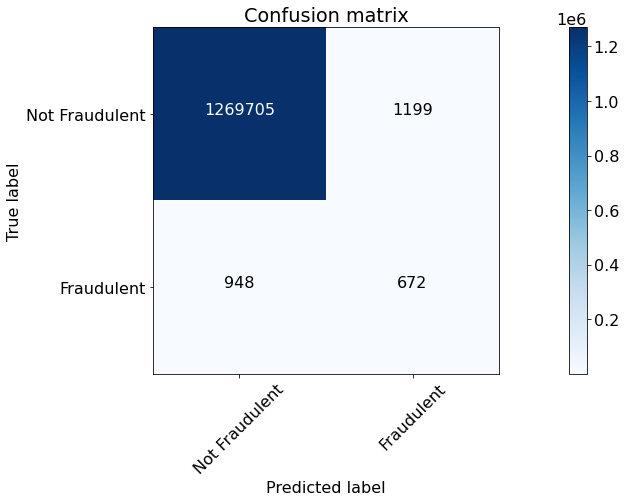

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = data.drop(['isFraud'], axis = 1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model(y_test, y_pred)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['Not Fraudulent', 'Fraudulent'])

# Random Forest Classifier

Accuracy Score:  0.9997068817562577
Precision Score:  0.9822119102861562
Recall Score:  0.7839506172839507
F1 Score:  0.8719533127360111
Confusion Matrix:  [[1270881      23]
 [    350    1270]]
Confusion matrix, without normalization
[[1270881      23]
 [    350    1270]]


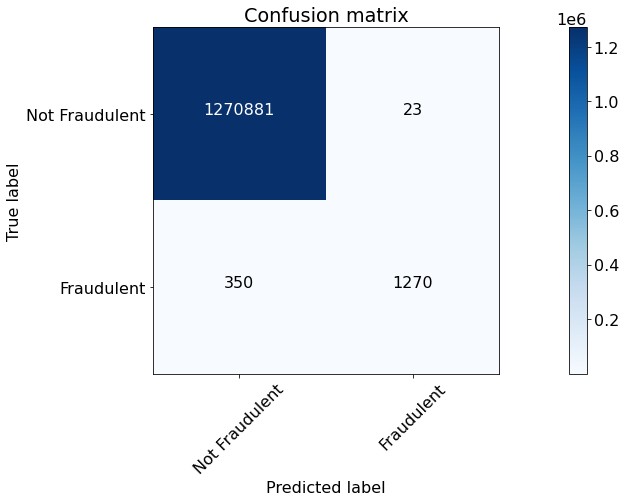

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

evaluate_model(y_test, rfc_pred)
plot_confusion_matrix(confusion_matrix(y_test, rfc_pred), classes=['Not Fraudulent', 'Fraudulent'])

# Accuracy comparision between Models


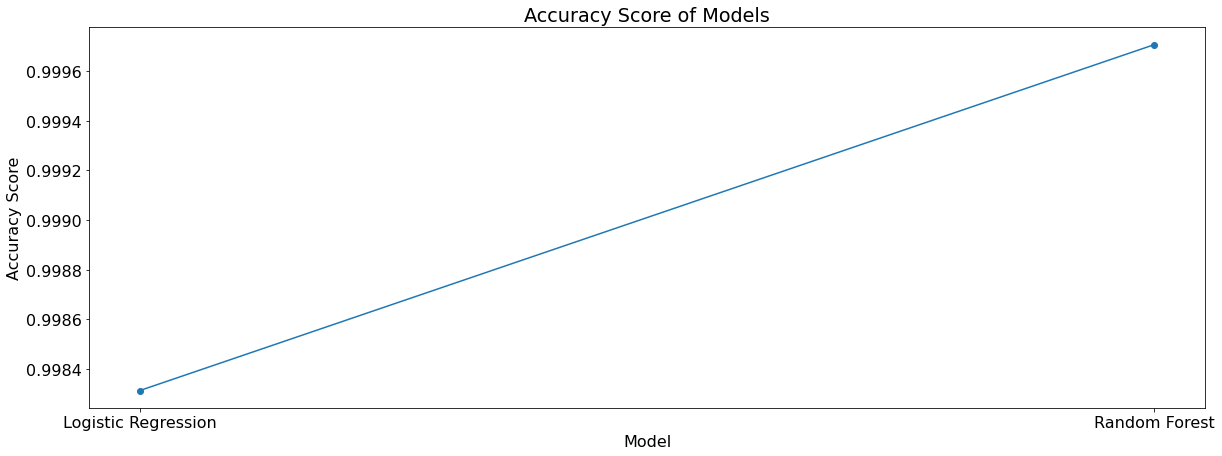

In [22]:
# plot compare accuracy score of two models
plt.figure(figsize=(20,7))
plt.plot(['Logistic Regression', 'Random Forest'], [accuracy_score(y_test, y_pred), accuracy_score(y_test, rfc_pred)], marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score of Models')
plt.show()